   Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0    1  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1    2  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2    3  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3    4  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4    5  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   ...  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29  \
0  ..

C:\Users\gursh\AppData\Local\Temp\ipykernel_21160\3619637541.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


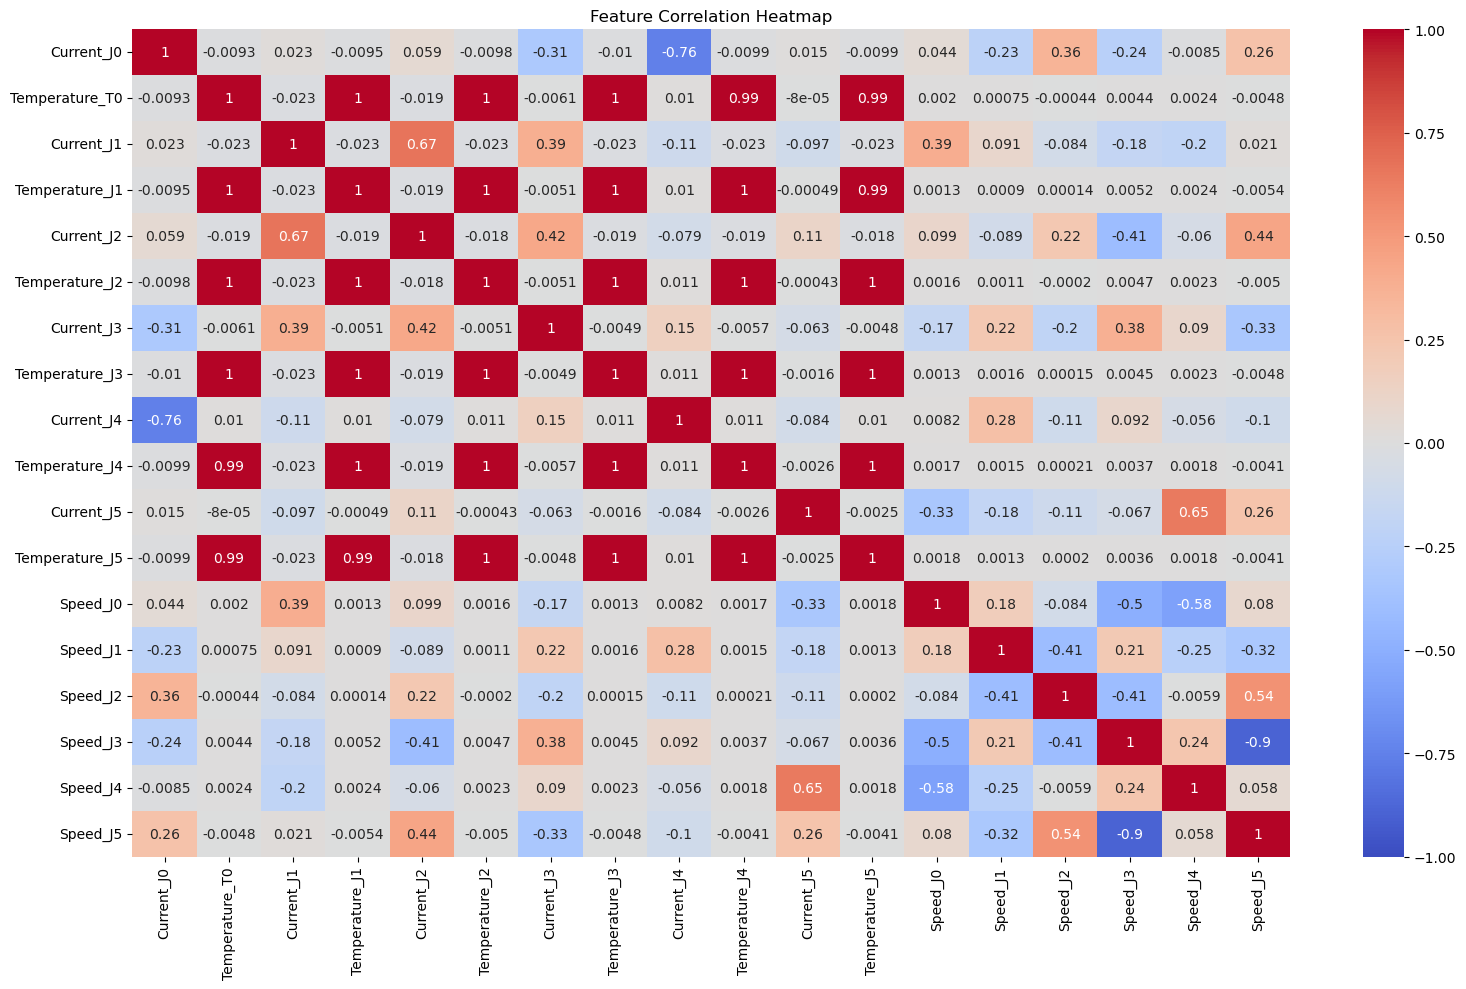

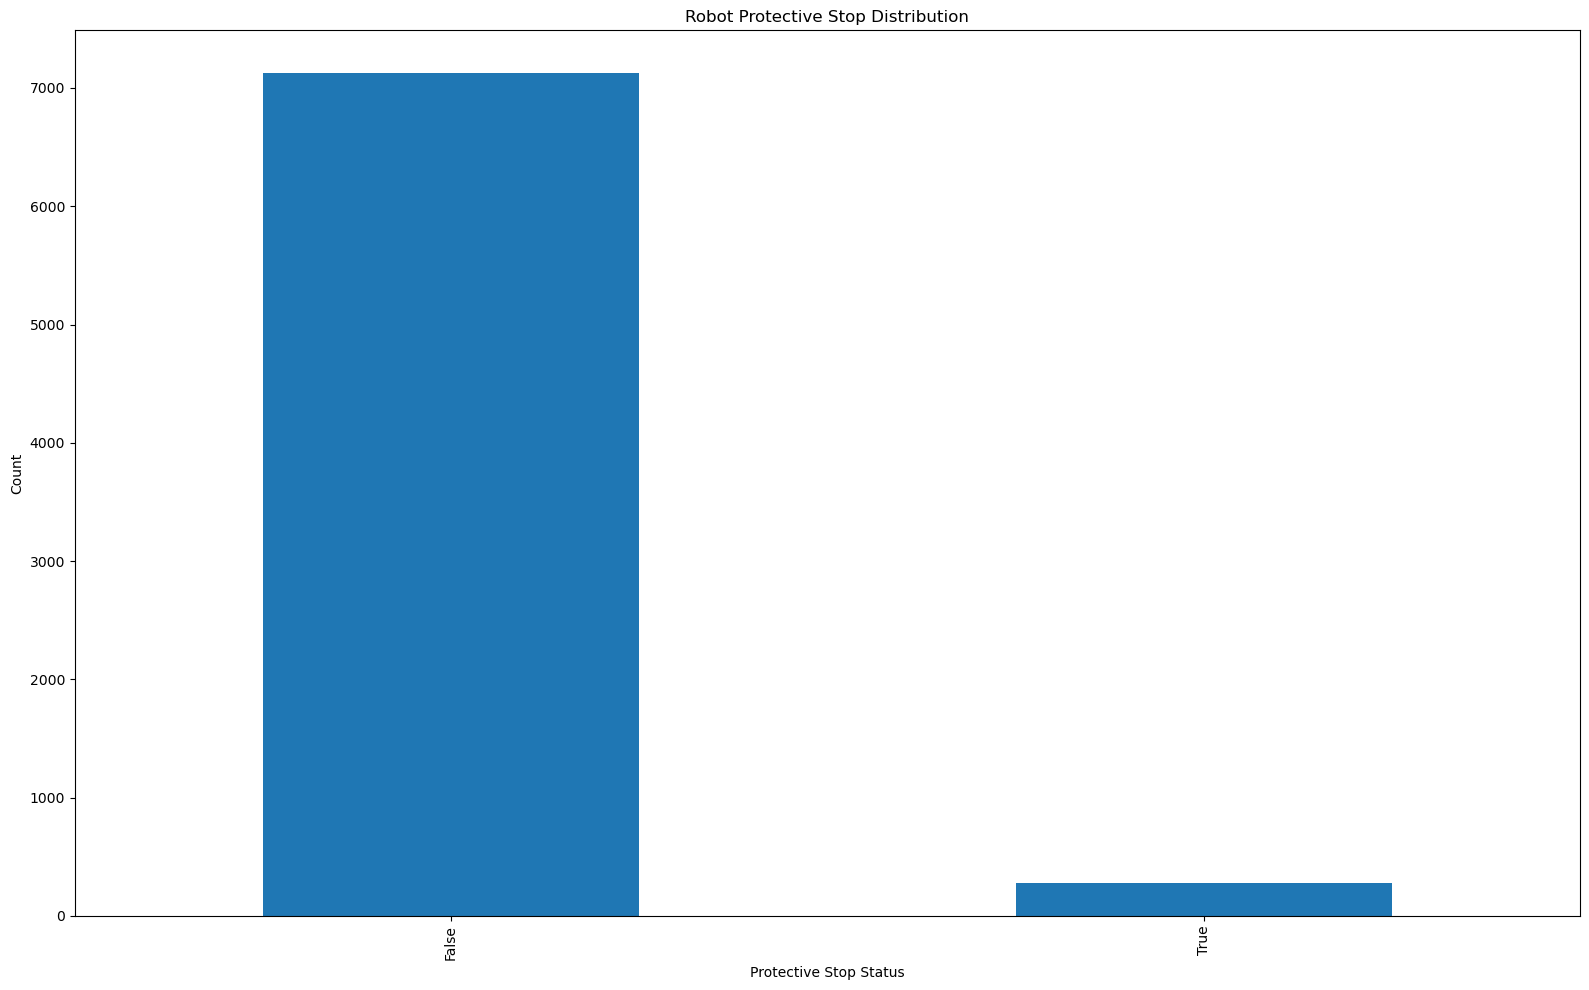

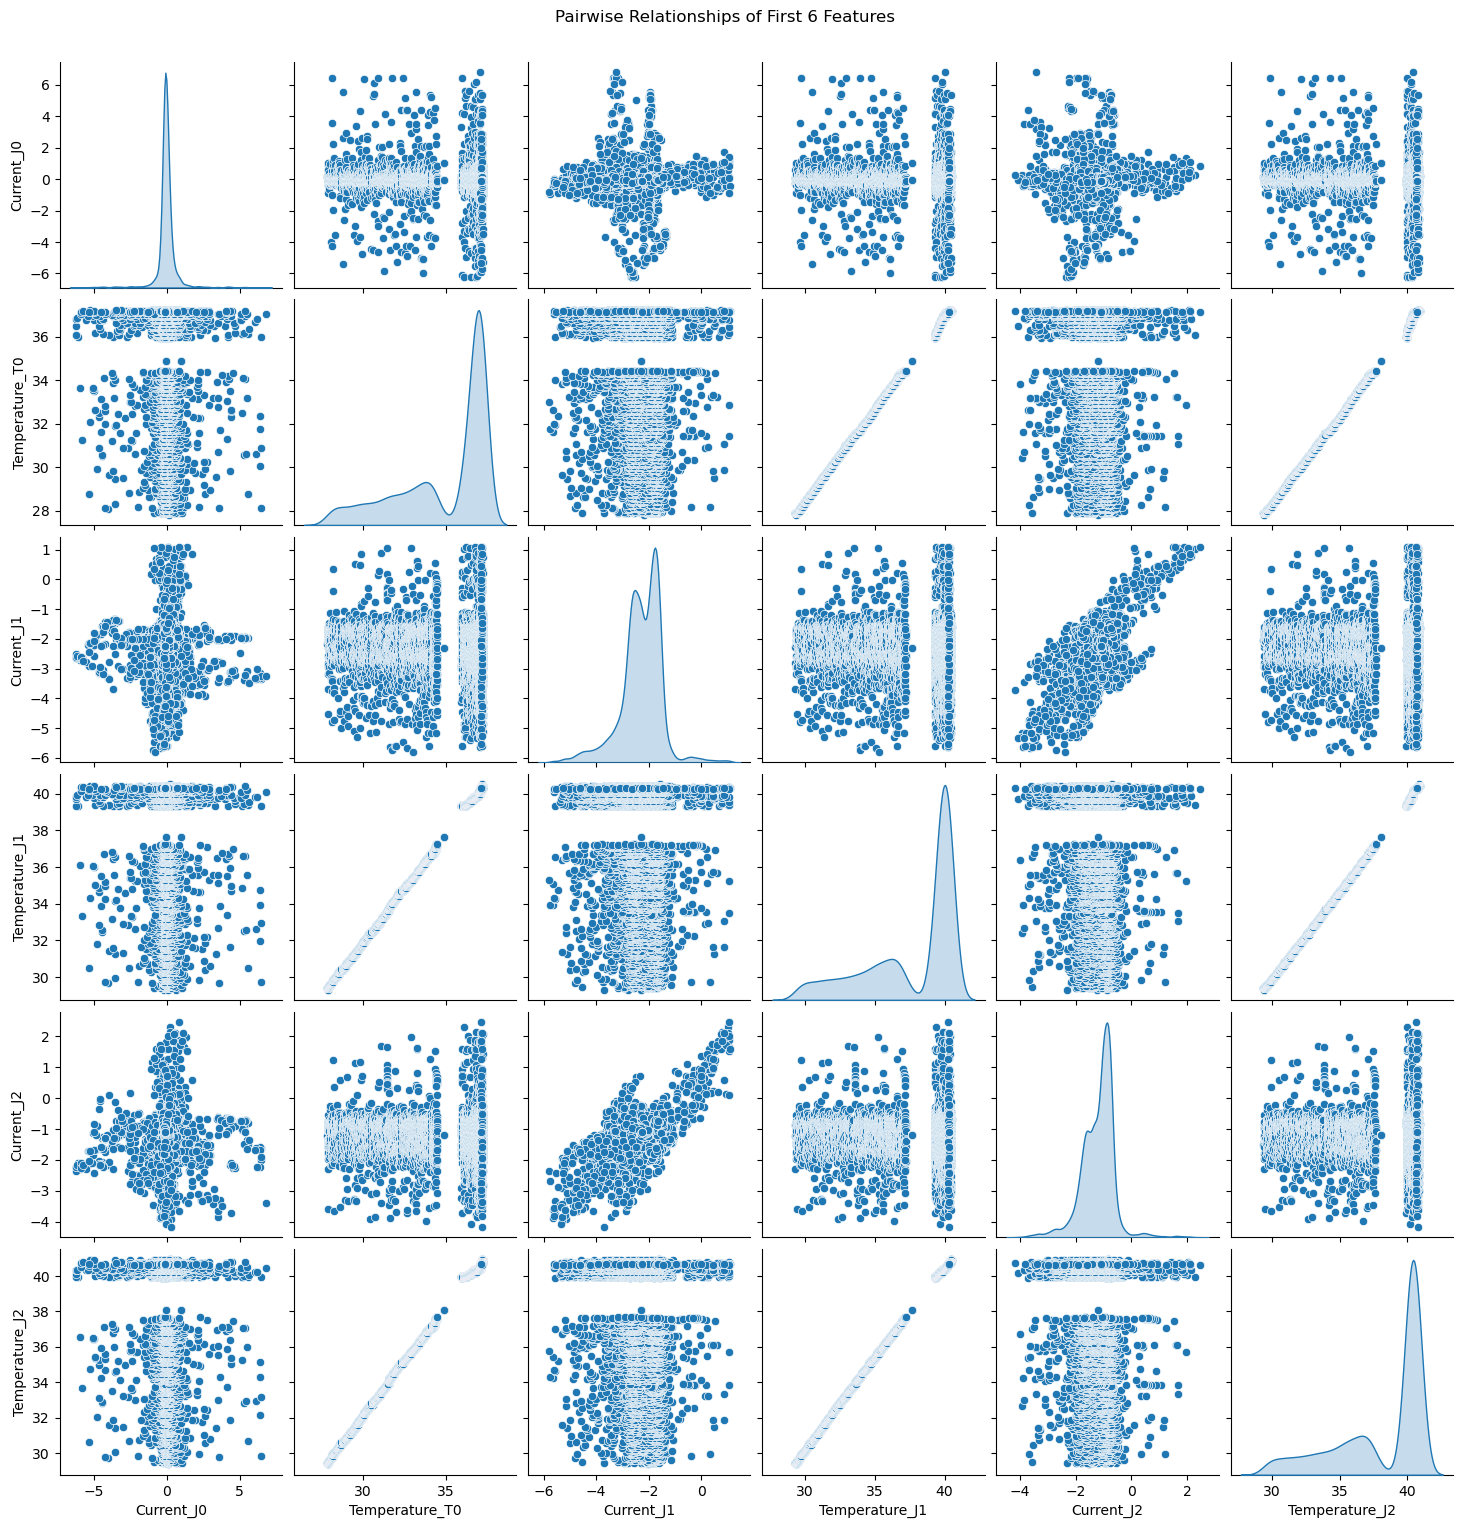

C:\Users\gursh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 24' 'Unnamed: 25' 'Unnamed: 26' 'Unnamed: 27' 'Unnamed: 28'
 'Unnamed: 29' 'Unnamed: 30' 'Unnamed: 31' 'Unnamed: 32' 'Unnamed: 33'
 'Unnamed: 34']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\gursh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 24' 'Unnamed: 25' 'Unnamed: 26' 'Unnamed: 27' 'Unnamed: 28'
 'Unnamed: 29' 'Unnamed: 30' 'Unnamed: 31' 'Unnamed: 32' 'Unnamed: 33'
 'Unnamed: 34']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



SVM Accuracy: 0.934885290148448
KNN Accuracy: 0.9335357624831309
Decision Tree Accuracy: 0.9406207827260459

Classification Report - SVM:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       106
           1       0.00      0.00      0.00        89

   micro avg       1.00      0.01      0.01       195
   macro avg       0.50      0.00      0.01       195
weighted avg       0.54      0.01      0.01       195
 samples avg       0.00      0.00      0.00       195


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42       106
           1       0.43      0.24      0.30        89

   micro avg       0.48      0.30      0.37       195
   macro avg       0.47      0.29      0.36       195
weighted avg       0.48      0.30      0.37       195
 samples avg       0.02      0.02      0.02       195


Classification Report - Decision Tree:
              precision    re

C:\Users\gursh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gursh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gursh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gursh\anaconda3\Lib\site-packages\sklea

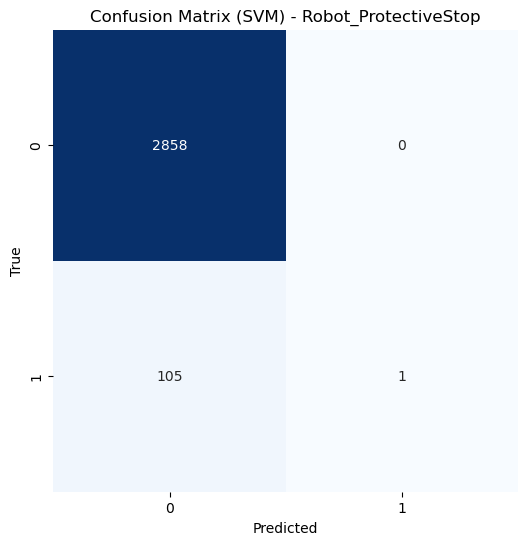


Confusion Matrix for Robot_ProtectiveStop - KNN:


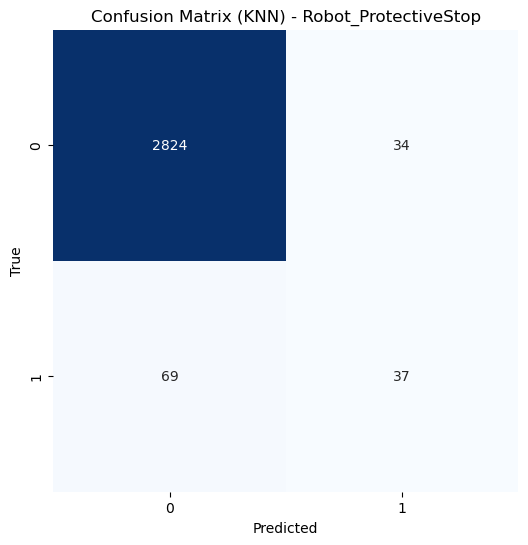


Confusion Matrix for Robot_ProtectiveStop - Decision Tree:


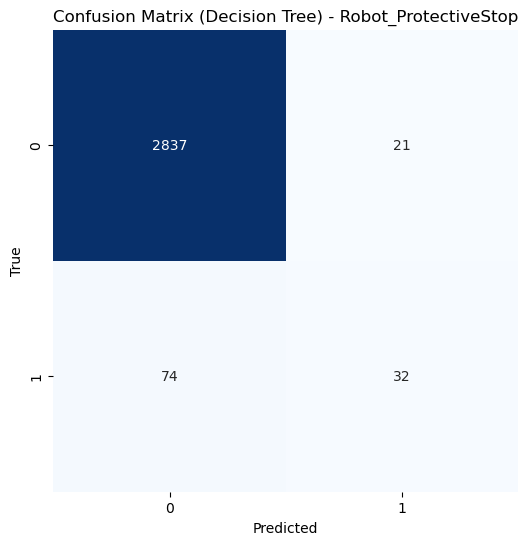


Confusion Matrix for grip_lost - SVM:


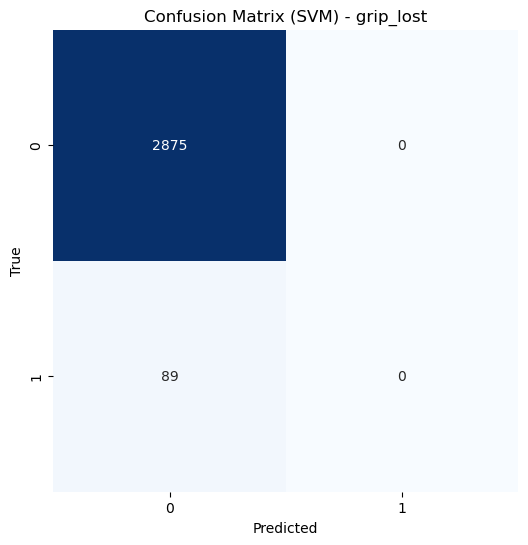


Confusion Matrix for grip_lost - KNN:


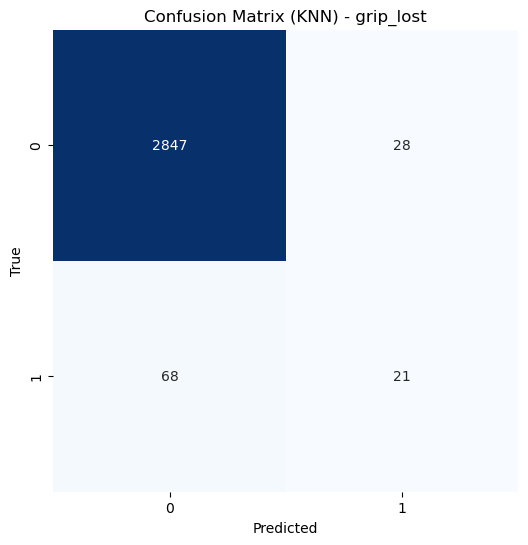


Confusion Matrix for grip_lost - Decision Tree:


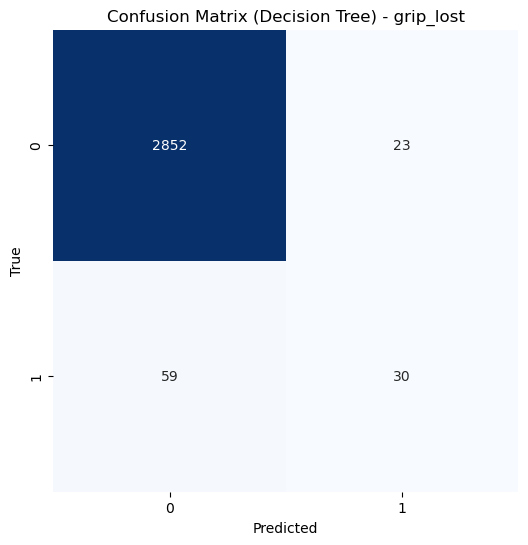


ROC Curve for Robot_ProtectiveStop - SVM:


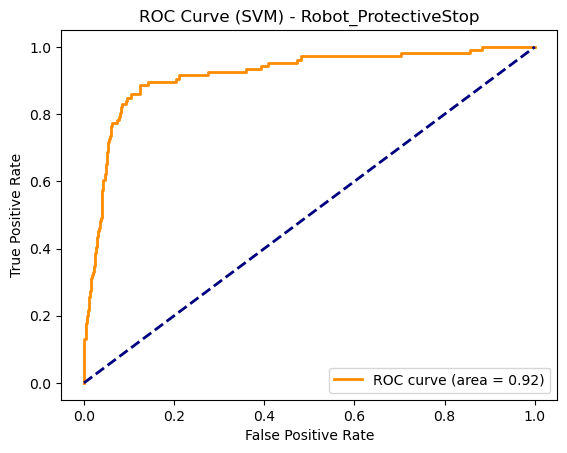


ROC Curve for Robot_ProtectiveStop - KNN:


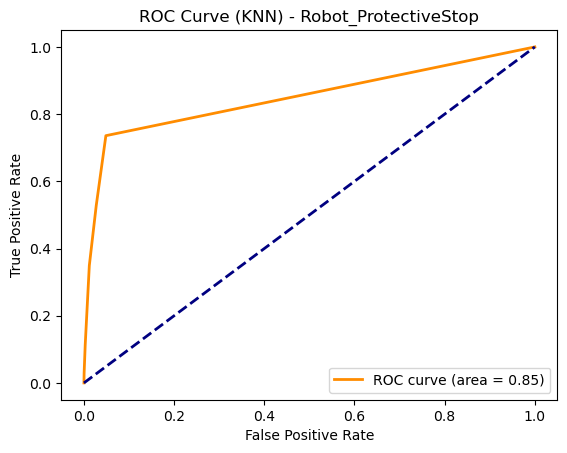


ROC Curve for Robot_ProtectiveStop - Decision Tree:


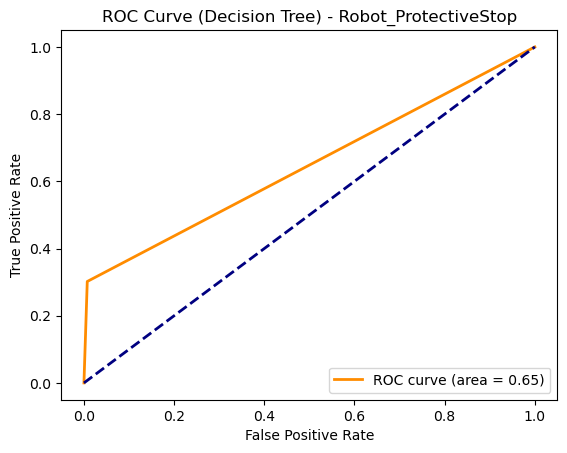


Precision-Recall Curve for Robot_ProtectiveStop - SVM:


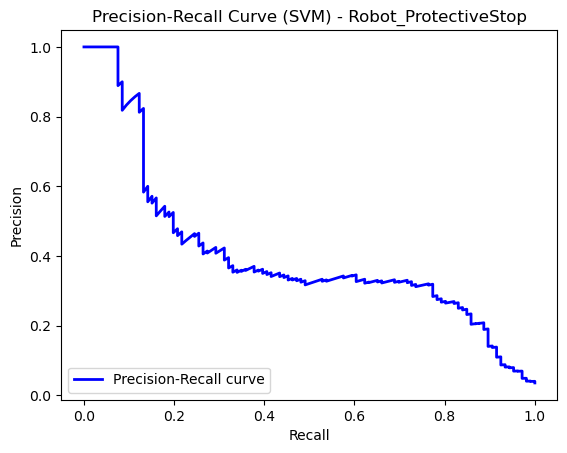


Precision-Recall Curve for Robot_ProtectiveStop - KNN:


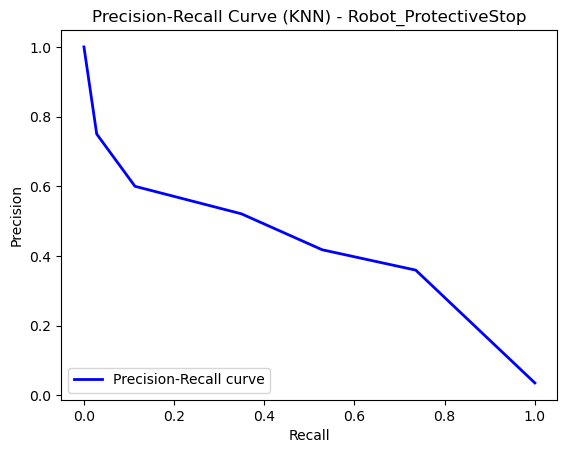


Precision-Recall Curve for Robot_ProtectiveStop - Decision Tree:


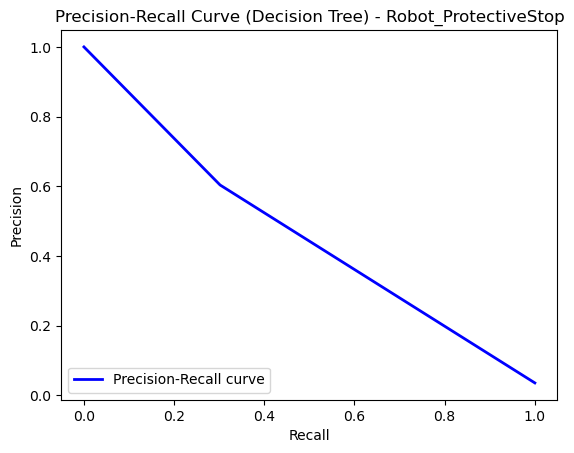

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score, hamming_loss,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
from sklearn.impute import SimpleImputer

# Loading the dataset 
df = pd.read_csv("UR3 CobotOps Dataset.csv")
print(df.head())
print(df.dtypes)

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())

# 'Robot_ProtectiveStop', 'grip_lost' column contains the target variable
x = df.drop(columns=['Robot_ProtectiveStop', 'grip_lost'])  # Features
y = df[['Robot_ProtectiveStop', 'grip_lost']]  # Target

# Identify categorical columns in features
categorical_cols = x.select_dtypes(include=['object', 'category']).columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Data Visualization

# 2. Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()


# 4. Bar Plot of Protective Stop Distribution
plt.figure(figsize=(16, 10))
df[classification_target].value_counts().plot(kind='bar')
plt.title('Robot Protective Stop Distribution')
plt.xlabel('Protective Stop Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Additional Pairplot for Key Features
sns.pairplot(df[feature_columns[:6]], diag_kind='kde')
plt.suptitle('Pairwise Relationships of First 6 Features', y=1.02)
plt.show()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

# Preprocess the data
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

# Define base models
svm_model = SVC(probability=True)  # Enable probability for ROC curve
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier()

# Wrap models in MultiOutputClassifier
multi_svm = MultiOutputClassifier(svm_model).fit(x_train, y_train)
multi_knn = MultiOutputClassifier(knn_model).fit(x_train, y_train)
multi_dt = MultiOutputClassifier(dt_model).fit(x_train, y_train)


# Make predictions
y_pred_svm = multi_svm.predict(x_test)
y_pred_knn = multi_knn.predict(x_test)
y_pred_dt = multi_dt.predict(x_test)


# Evaluate models
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nClassification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))


# F1 Scores for better evaluation in case of imbalanced data
print("\nF1 Score for SVM:", f1_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score for KNN:", f1_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score for Decision Tree:", f1_score(y_test, y_pred_dt, average='weighted'))

# Hamming loss for multi-label classification
print("\nHamming Loss for SVM:", hamming_loss(y_test, y_pred_svm))
print("Hamming Loss for KNN:", hamming_loss(y_test, y_pred_knn))
print("Hamming Loss for Decision Tree:", hamming_loss(y_test, y_pred_dt))

# Confusion Matrix for each target variable
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each target variable
for i, target in enumerate(y.columns):
    print(f"\nConfusion Matrix for {target} - SVM:")
    plot_confusion_matrix(y_test.iloc[:, i], y_pred_svm[:, i], f"Confusion Matrix (SVM) - {target}")

    print(f"\nConfusion Matrix for {target} - KNN:")
    plot_confusion_matrix(y_test.iloc[:, i], y_pred_knn[:, i], f"Confusion Matrix (KNN) - {target}")

    print(f"\nConfusion Matrix for {target} - Decision Tree:")
    plot_confusion_matrix(y_test.iloc[:, i], y_pred_dt[:, i], f"Confusion Matrix (Decision Tree) - {target}")

# ROC Curve and Precision-Recall Curve for each target variable
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()


# Plot ROC and Precision-Recall curves for each target variable
for i, target in enumerate(y.columns):
    y_prob_svm = multi_svm.predict_proba(x_test)[i][:, 1]
    y_prob_knn = multi_knn.predict_proba(x_test)[i][:, 1]
    y_prob_dt = multi_dt.predict_proba(x_test)[i][:, 1]

    print(f"\nROC Curve for {target} - SVM:")
    plot_roc_curve(y_test.iloc[:, i], y_prob_svm, f"ROC Curve (SVM) - {target}")

    print(f"\nROC Curve for {target} - KNN:")
    plot_roc_curve(y_test.iloc[:, i], y_prob_knn, f"ROC Curve (KNN) - {target}")

    print(f"\nROC Curve for {target} - Decision Tree:")
    plot_roc_curve(y_test.iloc[:, i], y_prob_dt, f"ROC Curve (Decision Tree) - {target}")

    print(f"\nPrecision-Recall Curve for {target} - SVM:")
    plot_precision_recall_curve(y_test.iloc[:, i], y_prob_svm, f"Precision-Recall Curve (SVM) - {target}")

    print(f"\nPrecision-Recall Curve for {target} - KNN:")
    plot_precision_recall_curve(y_test.iloc[:, i], y_prob_knn, f"Precision-Recall Curve (KNN) - {target}")

    print(f"\nPrecision-Recall Curve for {target} - Decision Tree:")
    plot_precision_recall_curve(y_test.iloc[:, i], y_prob_dt, f"Precision-Recall Curve (Decision Tree) - {target}")
